In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import utils
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

In [18]:
import keras
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l2




In [3]:
train_data_path = '/home/ec2-user/code/left-pca16' # Full path should be given here 
train_mask_path = 'mask/train/'
test_data_path = '/home/ec2-user/code/right-pca16' # Full path should be given here 
test_mask_path = 'mask/test/'

## Visualize Masks

In [4]:
files = []
folder = 'mask/train/'
path = []
for filename in os.listdir('mask/train/'):
    files.append(filename)
    path.append('{}{}'.format(folder,filename))

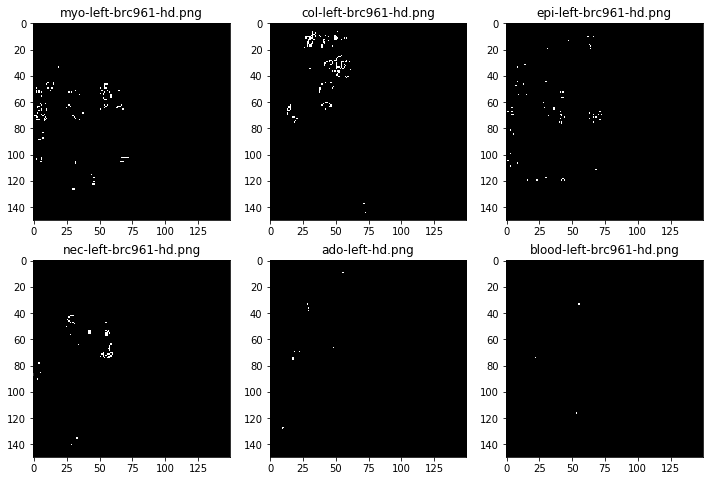

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()
for i in range(len(path)):
    img = load_img(path=path[i],grayscale=True, target_size=(150,150), interpolation='nearest')
    axs[i].imshow(img)
    axs[i].set_title(files[i])

In [6]:
files = []
folder = 'mask/test/'
path = []
for filename in os.listdir('mask/test/'):
    files.append(filename)
    path.append('{}{}'.format(folder,filename))

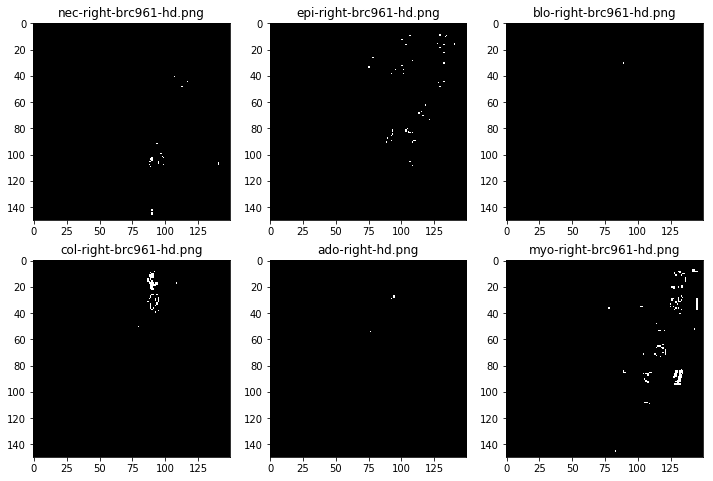

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()
for i in range(len(path)):
    img = load_img(path=path[i],grayscale=True, target_size=(150,150), interpolation='nearest')
    axs[i].imshow(img)
    axs[i].set_title(files[i])

In [ ]:
# Read data form training and test 

In [176]:
X_train,Y_train, num_bands = utils.load_data(data_path = train_data_path, 
                                             masks_path = train_mask_path, 
                                             crop_size = 33, 
                                             num_classes = 6, 
                                             samples = 100000, 
                                             balance = False)



 balance:  False


MemoryError: 

In [51]:
X_test,Y_test, num_bands = utils.load_data(data_path = test_data_path, 
                                           masks_path = test_mask_path, 
                                           crop_size = 33, 
                                           num_classes = 6, 
                                           samples = 100000, 
                                           balance = True)



 balance:  True

 number of samples:  6000 

loading class:  1  - samples:  1000
loading class:  2  - samples:  1000
loading class:  3  - samples:  1000
loading class:  4  - samples:  1000
loading class:  5  - samples:  1000
loading class:  6  - samples:  1000


In [174]:
print(type(X_train), type(Y_train))
print(X_train.shape, Y_train.shape, num_bands)
print(X_test.shape,  Y_test.shape,  num_bands)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 33, 33, 16) (60000, 6) 16
(6000, 33, 33, 16) (6000, 6) 16


In [155]:
X_train_list = np.array([X_train[i] for i in range(X_train.shape[0])])

In [156]:
X_test_list = np.array([X_test[i] for i in range(X_test.shape[0])])

In [157]:
Y_train_list = np.array([Y_train[i,:] for i in range(Y_train.shape[0])])

In [158]:
Y_test_list = np.array([Y_test[i,:] for i in range(Y_test.shape[0])])

# Build First Model

In [168]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(33, 33, 16)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(6))
# model.add(Activation('softmax'))

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(33, 33, 16),
                 kernel_regularizer=l2(0.01)))

model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 kernel_regularizer=l2(0.01)))

model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128,
                activation='relu',
                kernel_regularizer=l2(0.01)))
model.add(Dense(6,
                activation='softmax',
                kernel_regularizer=l2(0.01)))

In [169]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [170]:
model.fit(X_train_list, Y_train_list,
          epochs = 5,
          verbose = 1,
          batch_size= 50,
          validation_data=(X_test_list, Y_test_list))

Train on 6000 samples, validate on 6000 samples
Epoch 1/5
6000/6000 [==============================] - 2s 415us/step - loss: 1.8981 - acc: 0.7852 - val_loss: 1.8392 - val_acc: 0.5983
Epoch 2/5
6000/6000 [==============================] - 2s 310us/step - loss: 0.8565 - acc: 0.8848 - val_loss: 1.3140 - val_acc: 0.6732
Epoch 3/5
6000/6000 [==============================] - 2s 310us/step - loss: 0.6130 - acc: 0.9003 - val_loss: 1.1076 - val_acc: 0.6930
Epoch 4/5
6000/6000 [==============================] - 2s 310us/step - loss: 0.5224 - acc: 0.9050 - val_loss: 1.1299 - val_acc: 0.6763
Epoch 5/5
6000/6000 [==============================] - 2s 309us/step - loss: 0.4722 - acc: 0.9120 - val_loss: 1.1932 - val_acc: 0.6157


In [149]:
# # read data from S3
# import boto3
# client = boto3.client('s3') 
# #s3 = boto3.resource('s3')
# client.list_objects(Bucket=s3_bucket, Prefix = "{}/".format(subdirectory), Delimiter='/')['Contents']
# s3_bucket = 'capstonelotfollahi'
# subdirectory = 'left-pca16'
# s3.list_objects(Bucket=s3_bucket, Prefix = "{}/".format(subdirectory), Delimiter='/')["Contents"]